# The Case Study: Classification

With the `classification_data`, build an algorithm to predict the binary label. Build a pipeline going from exploratory analysis to model performance evaluation adding comments to each stage.

## Import Necessary Libraries

In [1]:
!pip install -r ../requirements.txt --quiet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier

from sklearn.model_selection import GridSearchCV

# from mrmr import mrmr_classif

# Set the display options for pandas to display the full column
pd.set_option('display.max_columns', None)

# Set random state for reproducibility
RANDOM_STATE = 24

# Specify the path to the data file
DATA_PATH = "../data/raw/classification_data.csv"

# Config
BEST_PARAMS = "../config/best_params.json"

## Data Exploration

### None Graphical

In [3]:
# Read the data file
df = pd.read_csv(DATA_PATH)

# Display the first few rows of the data
df.head()

user_id  label  Account type  Duration of Credit (month)  \
0   586266      1             1                          18   
1   392565      1             1                           9   
2   204665      1             2                          12   
3   393307      1             1                          12   
4   627375      1             1                          12   

   Payment Status of Previous Credit  Purpose  Credit Amount  Savings type  \
0                                  4        2           1049             1   
1                                  4        0           2799             1   
2                                  2        9            841             2   
3                                  4        0           2122             1   
4                                  4        0           2171             1   

   Length of current employment  Instalment per cent  Marital Status  \
0                             2                    4               2   
1                             3                    2               3   
2                             4                    2               2   
3                             3                    3               3   
4                             3                    4               3   

   Guarantors  Duration in Current address  Most valuable available asset  \
0           1                            4                              2   
1           1                            2                              1   
2           1                            4                              1   
3           1                            2                              1   
4           1                            4                              2   

   Age  Concurrent Credits  Type of apartment  No of Credits at this Bank  \
0   21                   3                  1                           1   
1   36                   3                  1                           2   
2   23                   3                  1                           1   
3   39                   3                  1                           2   
4   38                   1                  2                           2   

   Occupation  No of dependents  Telephone  Foreign Worker  
0           3                 1          1               1  
1           3                 2          1               1  
2           2                 1          1               1  
3           2                 2          1               2  
4           2                 1          1               2

From the sample rows above, we can see the columns and their respective entries. We see a `user_id` column also, which might be a unique id for the users. We will explore this further and consider setting it as the index of the data.

Next, we will proceed to check the shape and other basic information about the data

In [4]:
# View the shape of the data
print("The data has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The data has 1000 rows and 22 columns


In [5]:
# View basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   user_id                            1000 non-null   int64
 1   label                              1000 non-null   int64
 2   Account type                       1000 non-null   int64
 3   Duration of Credit (month)         1000 non-null   int64
 4   Payment Status of Previous Credit  1000 non-null   int64
 5   Purpose                            1000 non-null   int64
 6   Credit Amount                      1000 non-null   int64
 7   Savings type                       1000 non-null   int64
 8   Length of current employment       1000 non-null   int64
 9   Instalment per cent                1000 non-null   int64
 10  Marital Status                     1000 non-null   int64
 11  Guarantors                         1000 non-null   int64
 12  Duration in Current a

The following are observed from the above output:

- All the columns are numerical
- No null values in the columns
- Some of the column name have whitespaces between them

Based on this, we might consider replacing the whitespaces with underscore (_).

Next, we will proceed to check the unique values in the `user_id` column, to confirm its suitability as the index of the data

In [6]:
# Display the count of unique values in user_id column
df['user_id'].nunique()

1000

`1000` unique ids means the column can be set as the index of the data

Let's now view some summary statistics of the data, including the 5-nuumber summary

#### Statistical Summary

In [7]:
# Display summary statistics for the data
df.describe().T

count        mean            std    min  \
user_id                            1000.0  396518.897  225382.045777  505.0   
label                              1000.0       0.700       0.458487    0.0   
Account type                       1000.0       2.577       1.257638    1.0   
Duration of Credit (month)         1000.0      20.903      12.058814    4.0   
Payment Status of Previous Credit  1000.0       2.545       1.083120    0.0   
Purpose                            1000.0       2.828       2.744439    0.0   
Credit Amount                      1000.0    3271.248    2822.751760  250.0   
Savings type                       1000.0       2.105       1.580023    1.0   
Length of current employment       1000.0       3.384       1.208306    1.0   
Instalment per cent                1000.0       2.973       1.118715    1.0   
Marital Status                     1000.0       2.682       0.708080    1.0   
Guarantors                         1000.0       1.145       0.477706    1.0   
Duration in Current address        1000.0       2.845       1.103718    1.0   
Most valuable available asset      1000.0       2.358       1.050209    1.0   
Age                                1000.0      35.542      11.352670   19.0   
Concurrent Credits                 1000.0       2.675       0.705601    1.0   
Type of apartment                  1000.0       1.928       0.530186    1.0   
No of Credits at this Bank         1000.0       1.407       0.577654    1.0   
Occupation                         1000.0       2.904       0.653614    1.0   
No of dependents                   1000.0       1.155       0.362086    1.0   
Telephone                          1000.0       1.404       0.490943    1.0   
Foreign Worker                     1000.0       1.037       0.188856    1.0   

                                        25%       50%        75%       max  
user_id                            201780.0  395127.5  586323.00  797738.0  
label                                   0.0       1.0       1.00       1.0  
Account type                            1.0       2.0       4.00       4.0  
Duration of Credit (month)             12.0      18.0      24.00      72.0  
Payment Status of Previous Credit       2.0       2.0       4.00       4.0  
Purpose                                 1.0       2.0       3.00      10.0  
Credit Amount                        1365.5    2319.5    3972.25   18424.0  
Savings type                            1.0       1.0       3.00       5.0  
Length of current employment            3.0       3.0       5.00       5.0  
Instalment per cent                     2.0       3.0       4.00       4.0  
Marital Status                          2.0       3.0       3.00       4.0  
Guarantors                              1.0       1.0       1.00       3.0  
Duration in Current address             2.0       3.0       4.00       4.0  
Most valuable available asset           1.0       2.0       3.00       4.0  
Age                                    27.0      33.0      42.00      75.0  
Concurrent Credits                      3.0       3.0       3.00       3.0  
Type of apartment                       2.0       2.0       2.00       3.0  
No of Credits at this Bank              1.0       1.0       2.00       4.0  
Occupation                              3.0       3.0       3.00       4.0  
No of dependents                        1.0       1.0       1.00       2.0  
Telephone                               1.0       1.0       2.00       2.0  
Foreign Worker                          1.0       1.0       1.00       2.0

Here's an explanation of the key metrics for each feature from the summary statistics above:

1. **count**: The number of non-null observations for each feature. In this case, all features have 1000 observations, indicating no missing data.
2. **mean**: The average value of the feature across all observations.
3. **std (standard deviation)**: A measure of how spread out the values are. A larger standard deviation indicates that the values vary more widely from the mean.
4. **min**: The minimum value in the feature.
5. **25% (First Quartile)**: The 25th percentile, which means that 25% of the data points are below this value.
6. **50% (Median)**: The median value, where half the data points are below and half are above this value.
7. **75% (Third Quartile)**: The 75th percentile, indicating that 75% of the data points are below this value.
8. **max**: The maximum value in the feature.

##### Breakdown of The Columns:

1. **user_id**:
   - The `user_id` ranges from 505 to 797,738. The mean `user_id` is 396,518, and there’s a significant spread (std = 225,382) between the user IDs, indicating a wide range of user identifiers. This has no further consideration as earlier highlighted.

2. **label**:
   - The `label` column seems binary (0 or 1), representing a categorical variable. The mean of 0.7 suggests that 70% of the labels are 1 (perhaps indicating a majority class). The minimum is 0, and the maximum is 1.

3. **Account type**:
   - This categorical feature ranges from 1 to 4. The average is 2.577, and 50% of the values are 2.0, suggesting that account types are skewed toward the lower values.

4. **Duration of Credit (month)**:
   - The credit duration ranges from 4 months to 72 months, with an average of 20.9 months. The interquartile range (IQR) from 12 months (25%) to 24 months (75%) shows most credit durations fall in this window.

5. **Payment Status of Previous Credit**:
   - This seems to range from 0 to 4, with an average of 2.545. The first quartile (25%) is 2, and 75% of the data is below 4.

6. **Purpose**:
   - The values range from 0 to 10, indicating various categories for the purpose of the credit. The median is 2.0, with 75% of the values below 3. This suggests a skew toward lower numbers.

7. **Credit Amount**:
   - The credit amount ranges from 250 to 18,424, with an average credit amount of 3,271. The standard deviation is large (2,822), suggesting significant variability in the credit amounts.

8. **Savings type**:
   - This categorical variable ranges from 1 to 5, with a mean of 2.105, indicating a skew toward lower values.

9. **Length of current employment**:
   - Employment duration ranges from 1 to 5, with a mean of 3.384, suggesting that most people have been employed for about 3 to 4 years.

10. **Instalment per cent**:
    - The instalment percentage ranges from 1 to 4, with a mean of 2.973, indicating that most instalments are around 3% to 4%.

11. **Marital Status**:
    - The marital status ranges from 1 to 4, with a mean of 2.682, suggesting that most respondents fall between statuses 2 and 3.

12. **Guarantors**:
    - Most of the values are 1 (mean = 1.145), indicating that many people do not have guarantors (if 1 represents no guarantor).

13. **Duration in Current Address**:
    - The duration in the current address ranges from 1 to 4, with a mean of 2.845, indicating that most people have stayed at their current address for 2 to 4 years.

14. **Most valuable available asset**:
    - This ranges from 1 to 4, with a mean of 2.358, indicating that the asset value skews toward the lower end.

15. **Age**:
    - Age ranges from 19 to 75, with a mean of 35.542 years. Most people are between 27 (25%) and 42 (75%) years old.

16. **Concurrent Credits**:
    - This ranges from 1 to 3, with a mean of 2.675. Most people have 2 or 3 concurrent credits.

17. **Type of apartment**:
    - The values range from 1 to 3, with a mean of 1.928, indicating that most people live in apartments of types 1 or 2.

18. **No of Credits at this Bank**:
    - This ranges from 1 to 4, with a mean of 1.407, suggesting that most people have just 1 or 2 credits at the bank.

19. **Occupation**:
    - Occupation ranges from 1 to 4, with a mean of 2.904, indicating that most people fall between occupation types 2 and 3.

20. **No of dependents**:
    - The number of dependents is between 1 and 2, with a mean of 1.155, indicating that most people have 1 dependent.

21. **Telephone**:
    - This binary feature has values of 1 and 2, with a mean of 1.404, suggesting that most people fall into the first category.

22. **Foreign Worker**:
    - The `Foreign Worker` column is binary (1 or 2), with a mean of 1.037, indicating that most individuals in the dataset are not foreign workers (if 1 represents non-foreign workers).

### Graphical

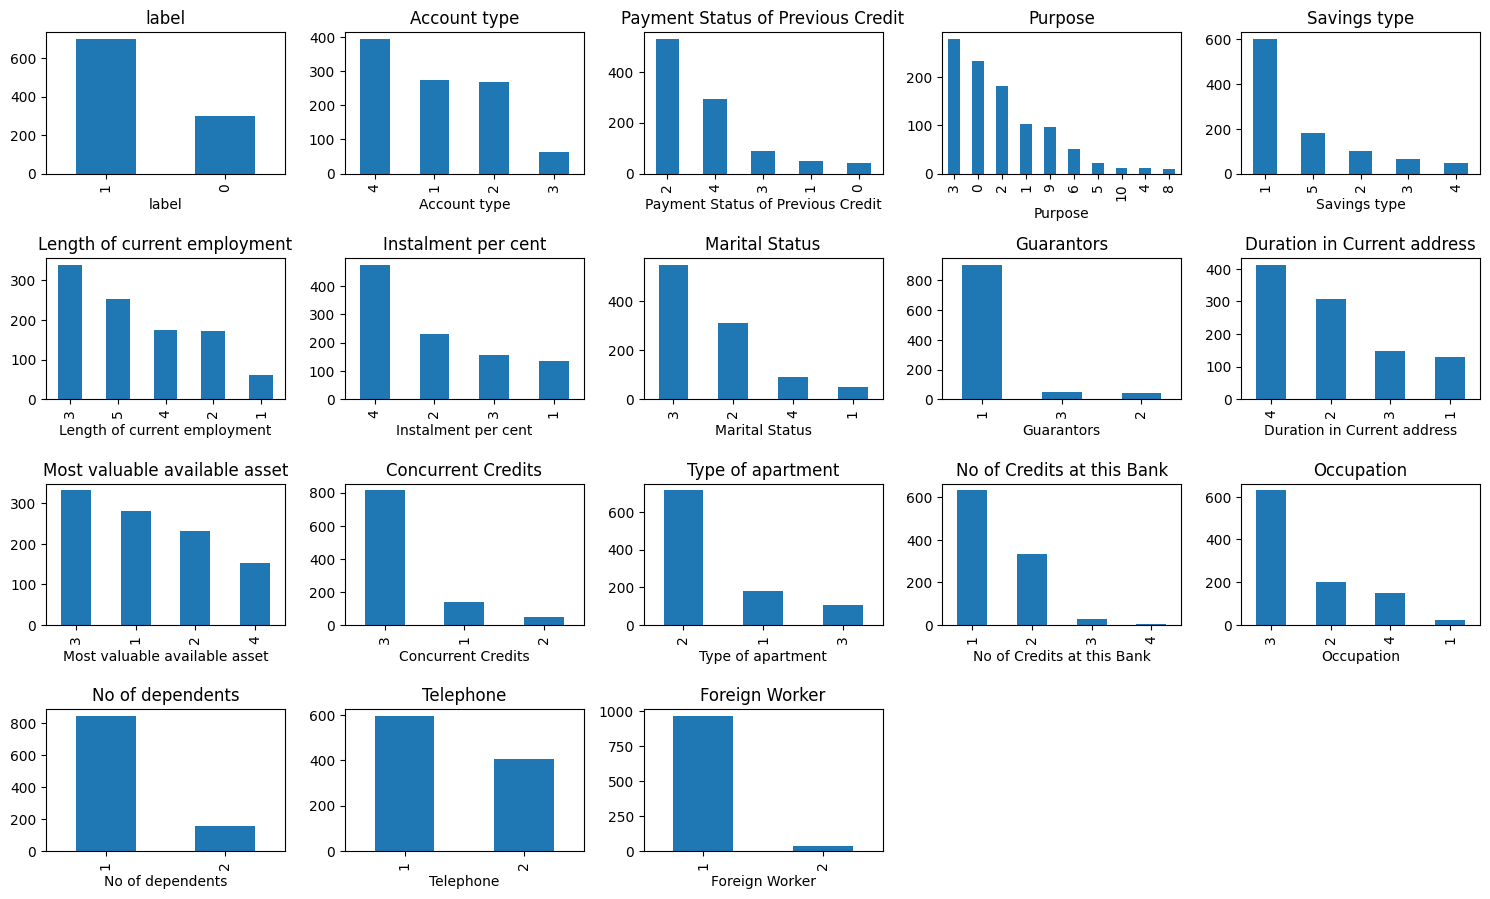

In [8]:
# Plot the bar chart of columns with less than 10 unique values in a 5 column grid

# Get the columns with less than 10 unique values
cols = df.columns[df.nunique() <= 10]

n_cols = 5
n_rows = round(len(cols) // 2)

# Plot the bar chart of the columns, making the grid as n_cols x n_rows
plt.figure(figsize=(15, 20))

for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i+1)
    df[col].value_counts().plot(kind='bar', title=col)
plt.tight_layout()
plt.show()

#### Outliers

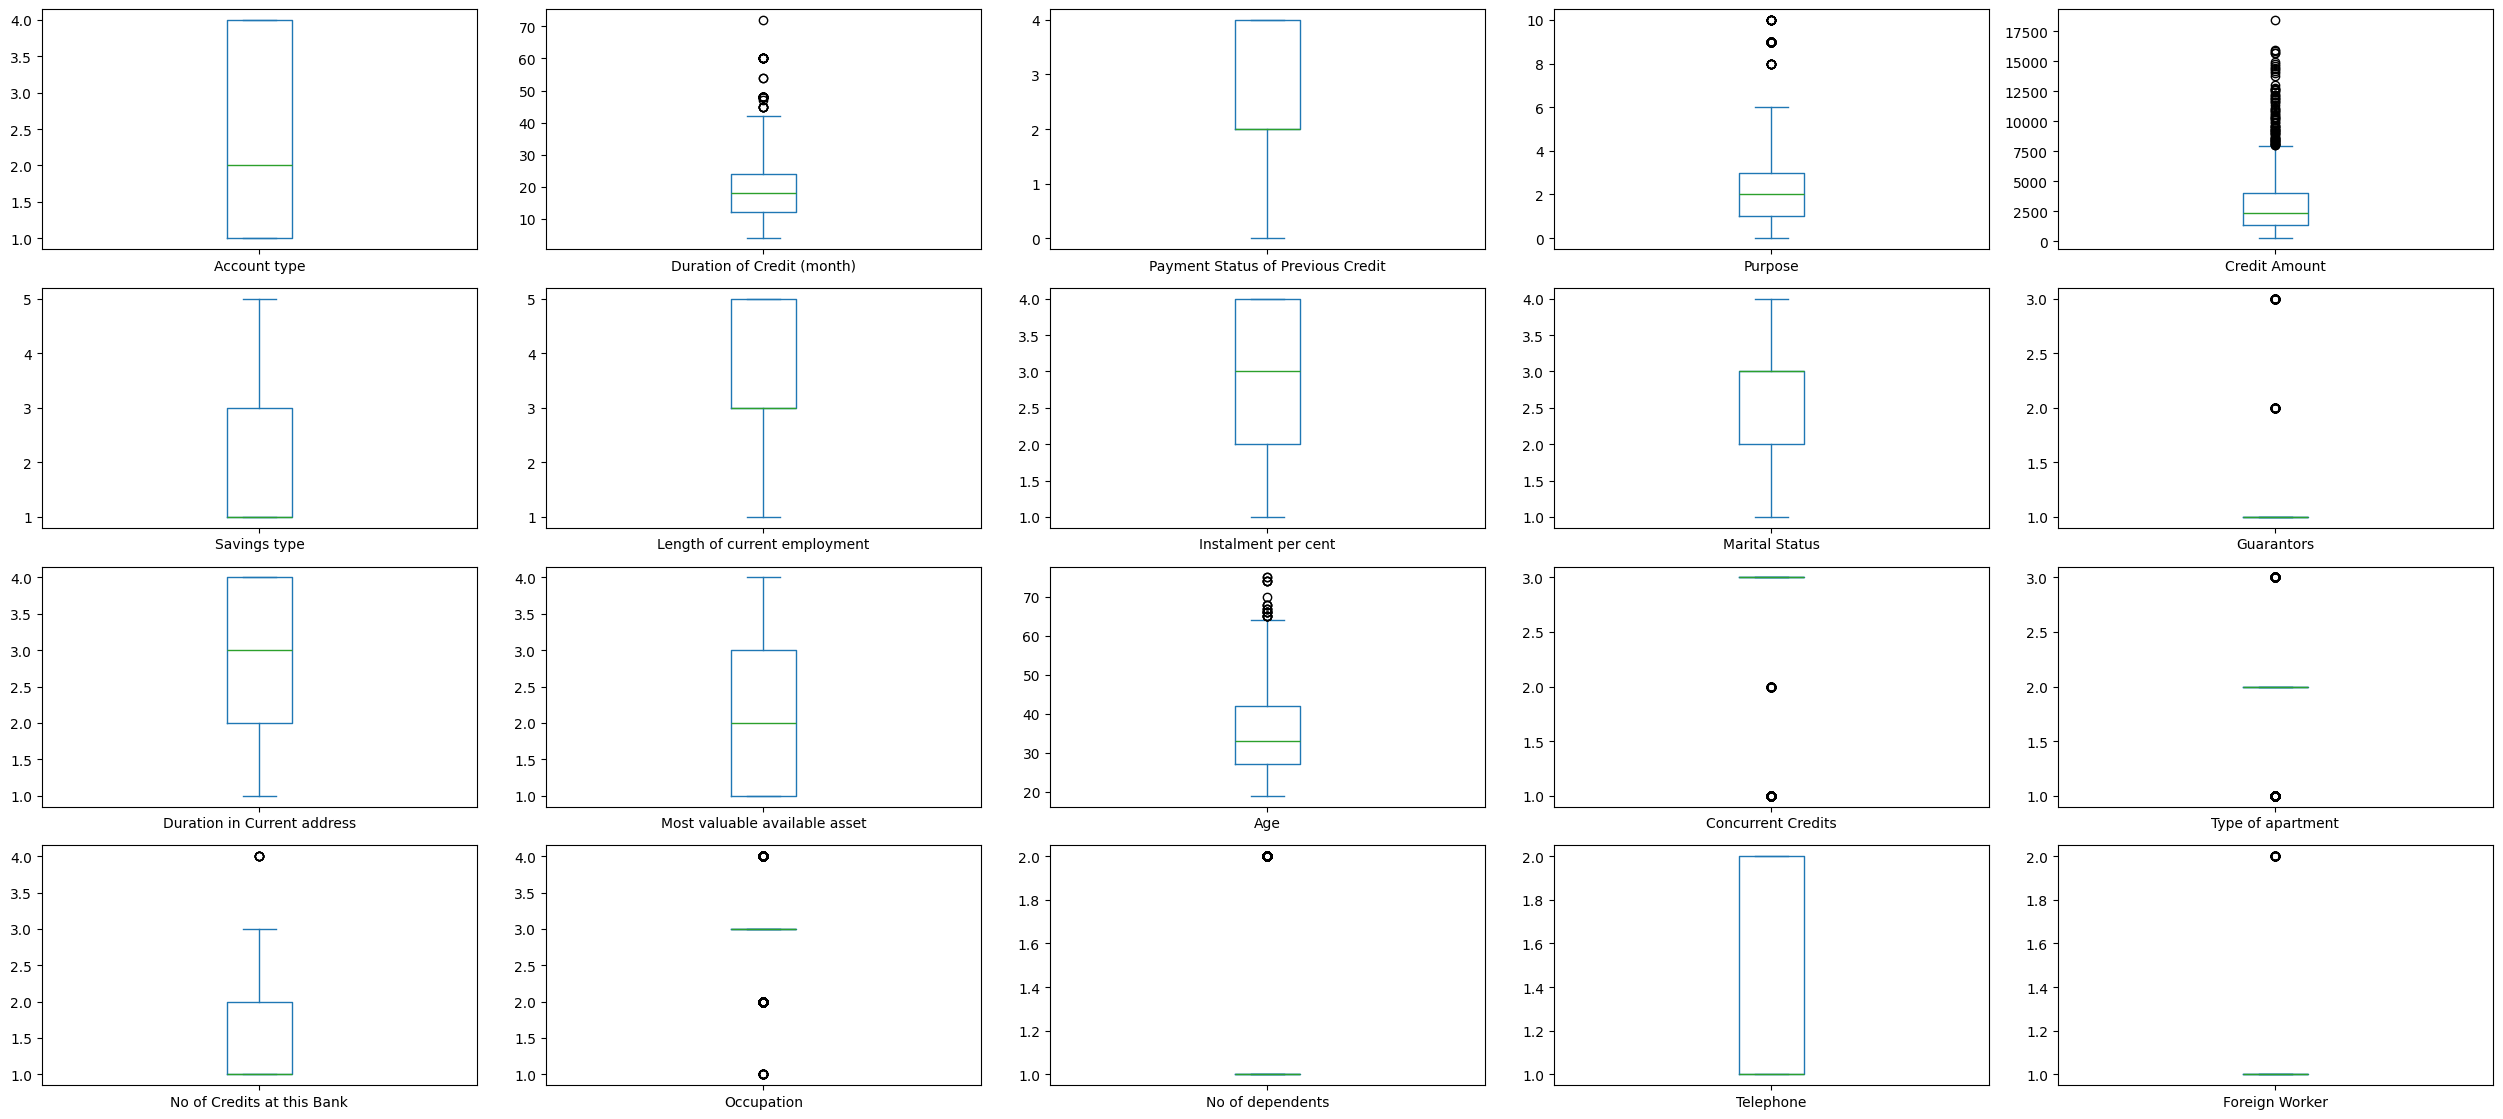

In [9]:
# Plot the boxplot of the numerical columns
target_var = "label"
index = "user_id"
(
    df.drop([index, target_var], axis=1).
    select_dtypes(include=['int64', 'float64']).
    plot(kind='box', subplots=True, layout=(n_rows, n_cols), figsize=(25, 25))
);
plt.tight_layout()
plt.show()

It is interesting to see that 

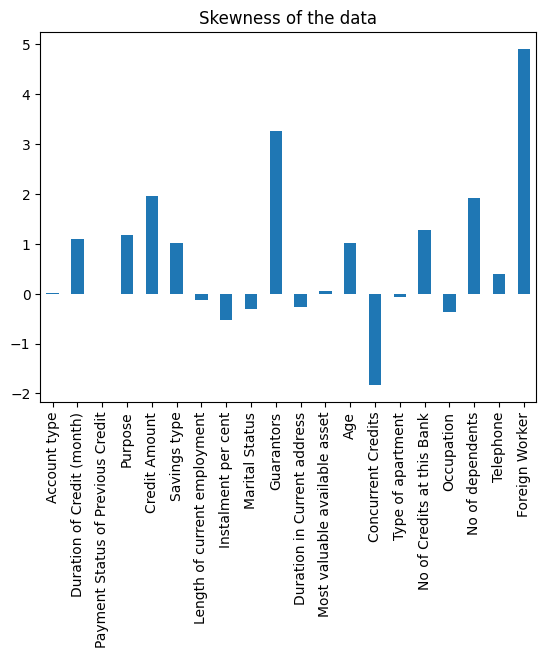

In [10]:
# Plot the skewness of the data with a histogram

skewness = df.drop([index, target_var], axis=1).skew()
skewness.plot(kind='bar', title='Skewness of the data')
plt.show()

<Axes: title={'center': 'Distribution of the target variable'}, xlabel='label'>

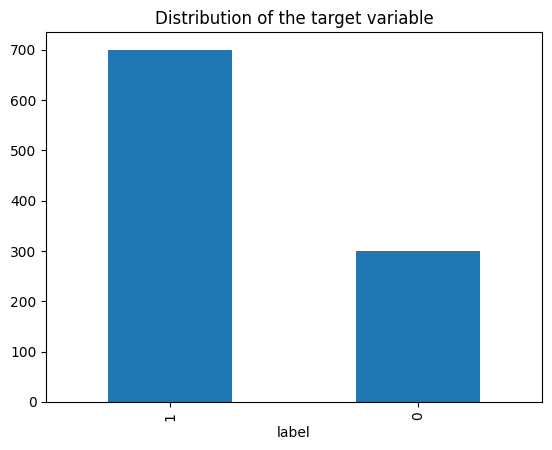

In [11]:
# Check the distribution of the target variable
df[target_var].value_counts().plot(kind='bar', title='Distribution of the target variable')

### Multivariate Analysis

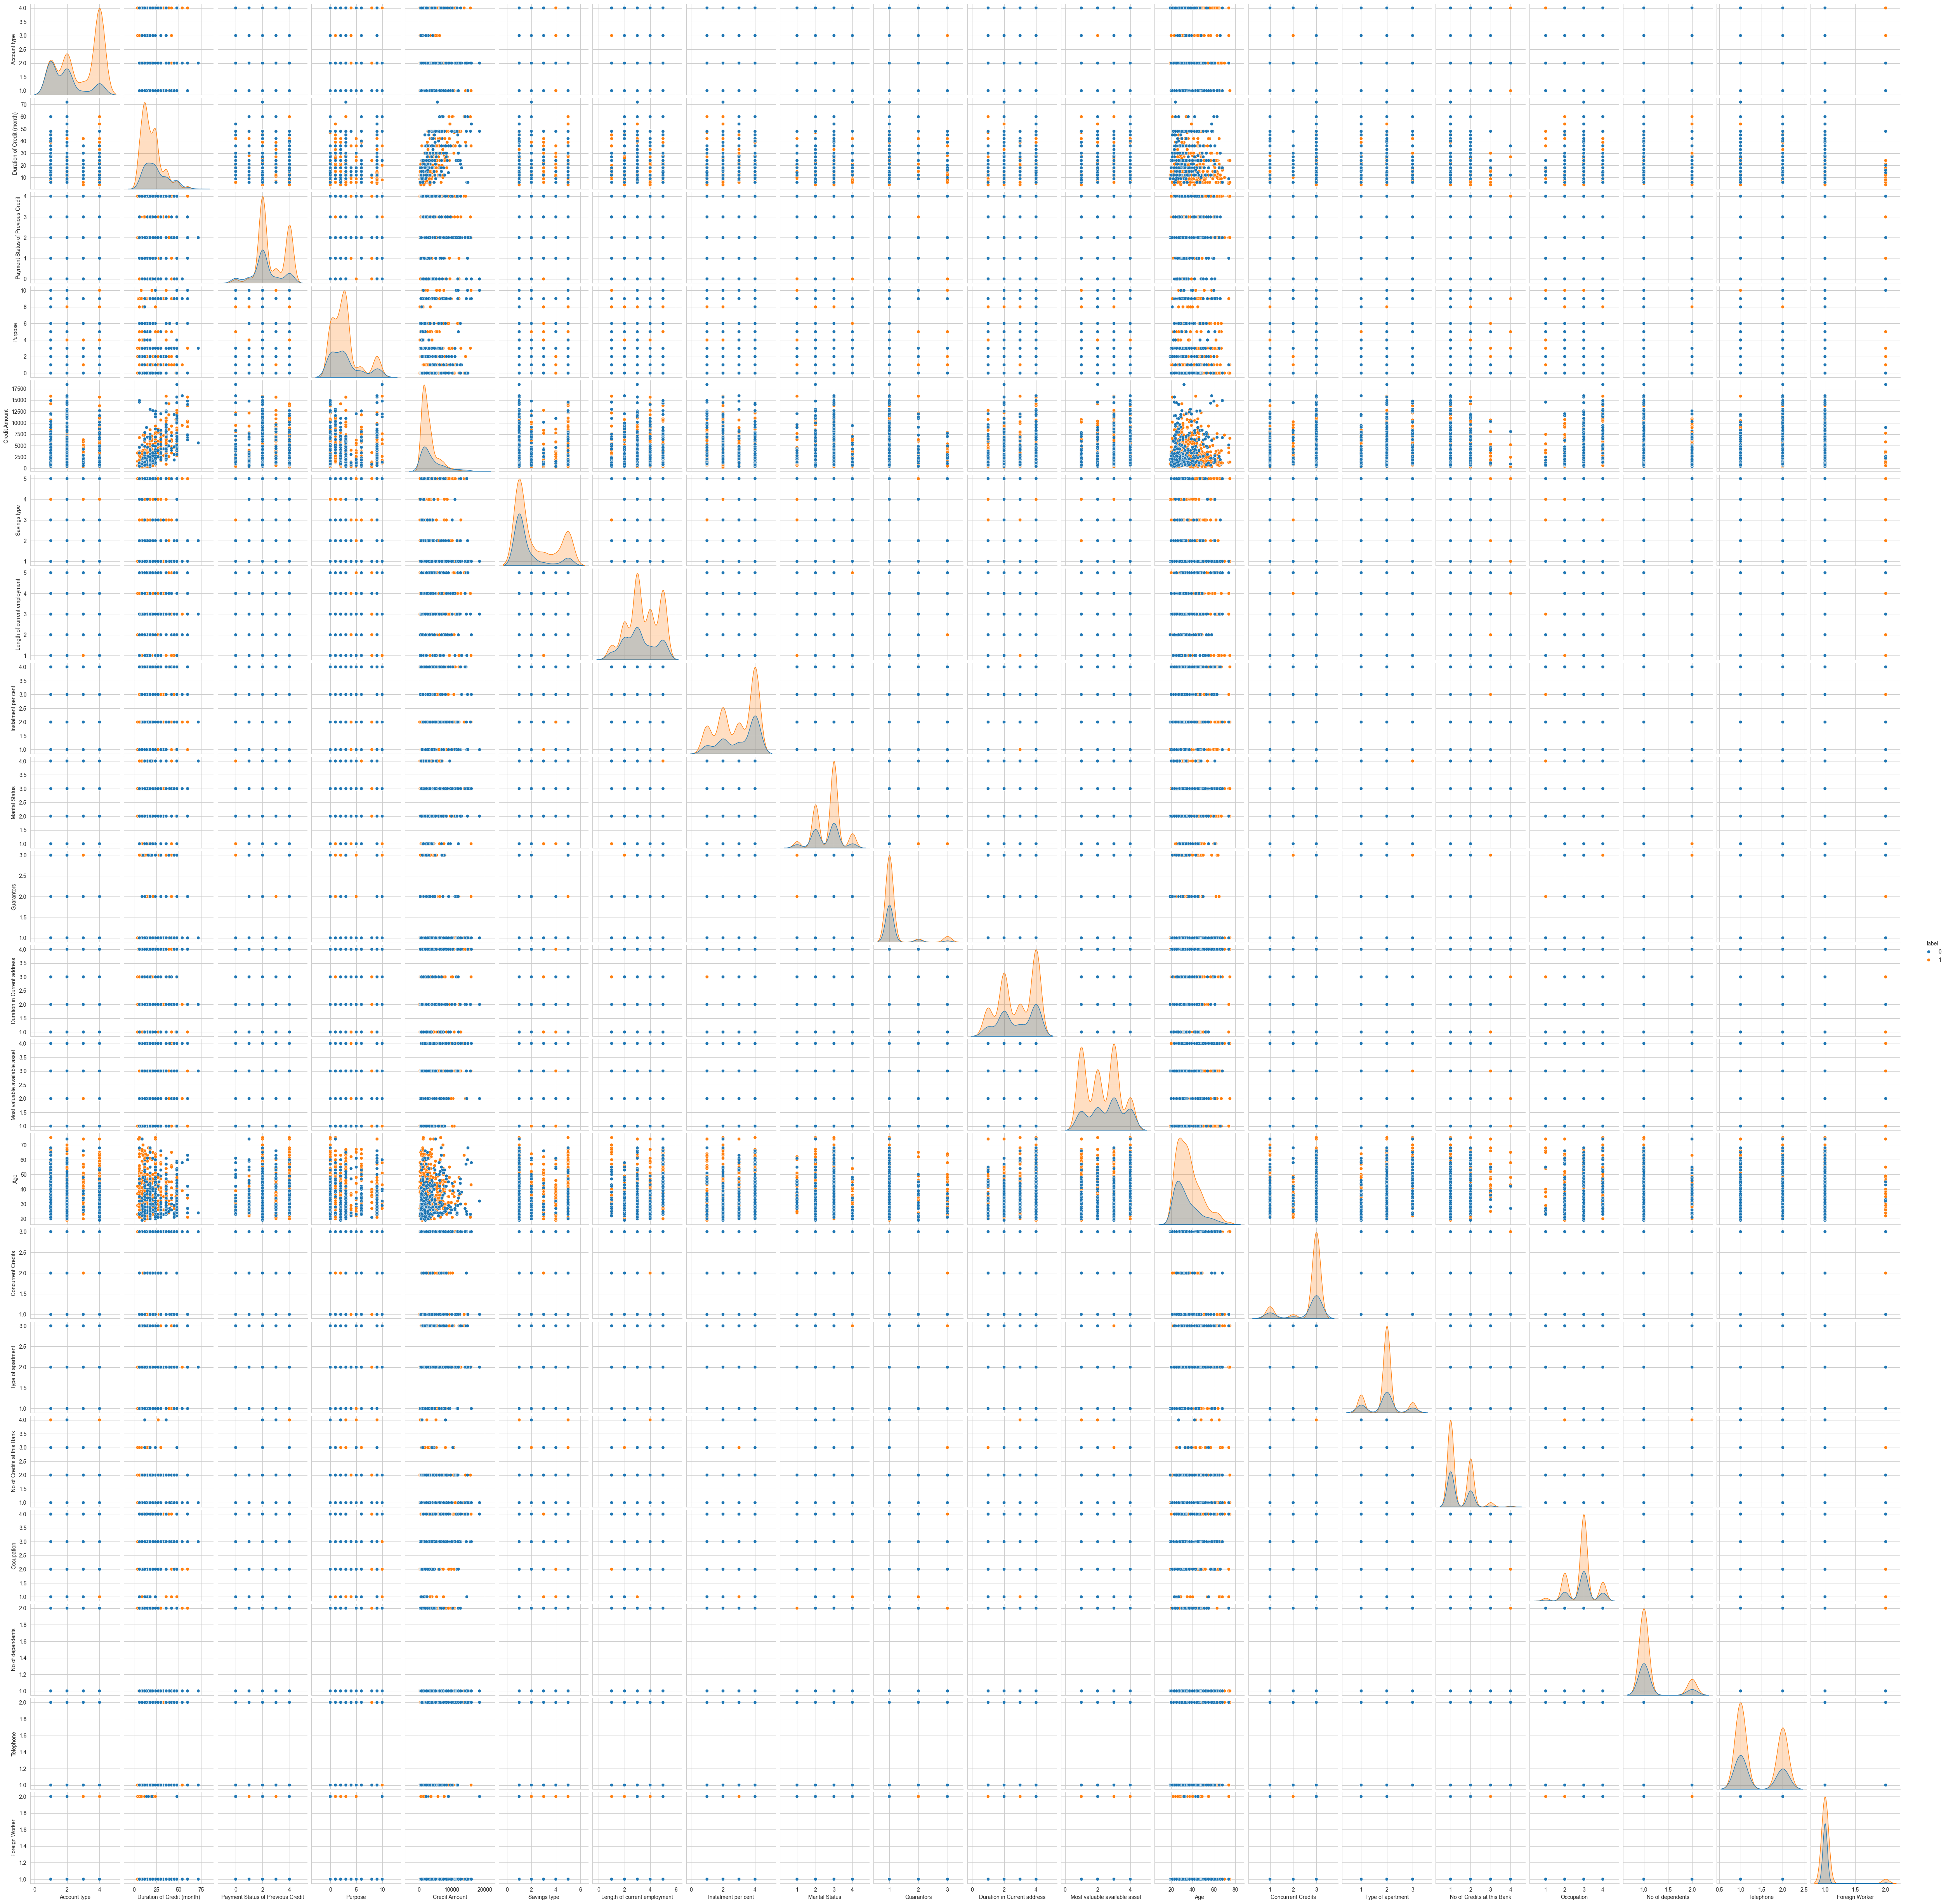

In [12]:
sns.set_style("whitegrid");
sns.pairplot(df.drop(columns=[index]), hue=target_var);
plt.show();

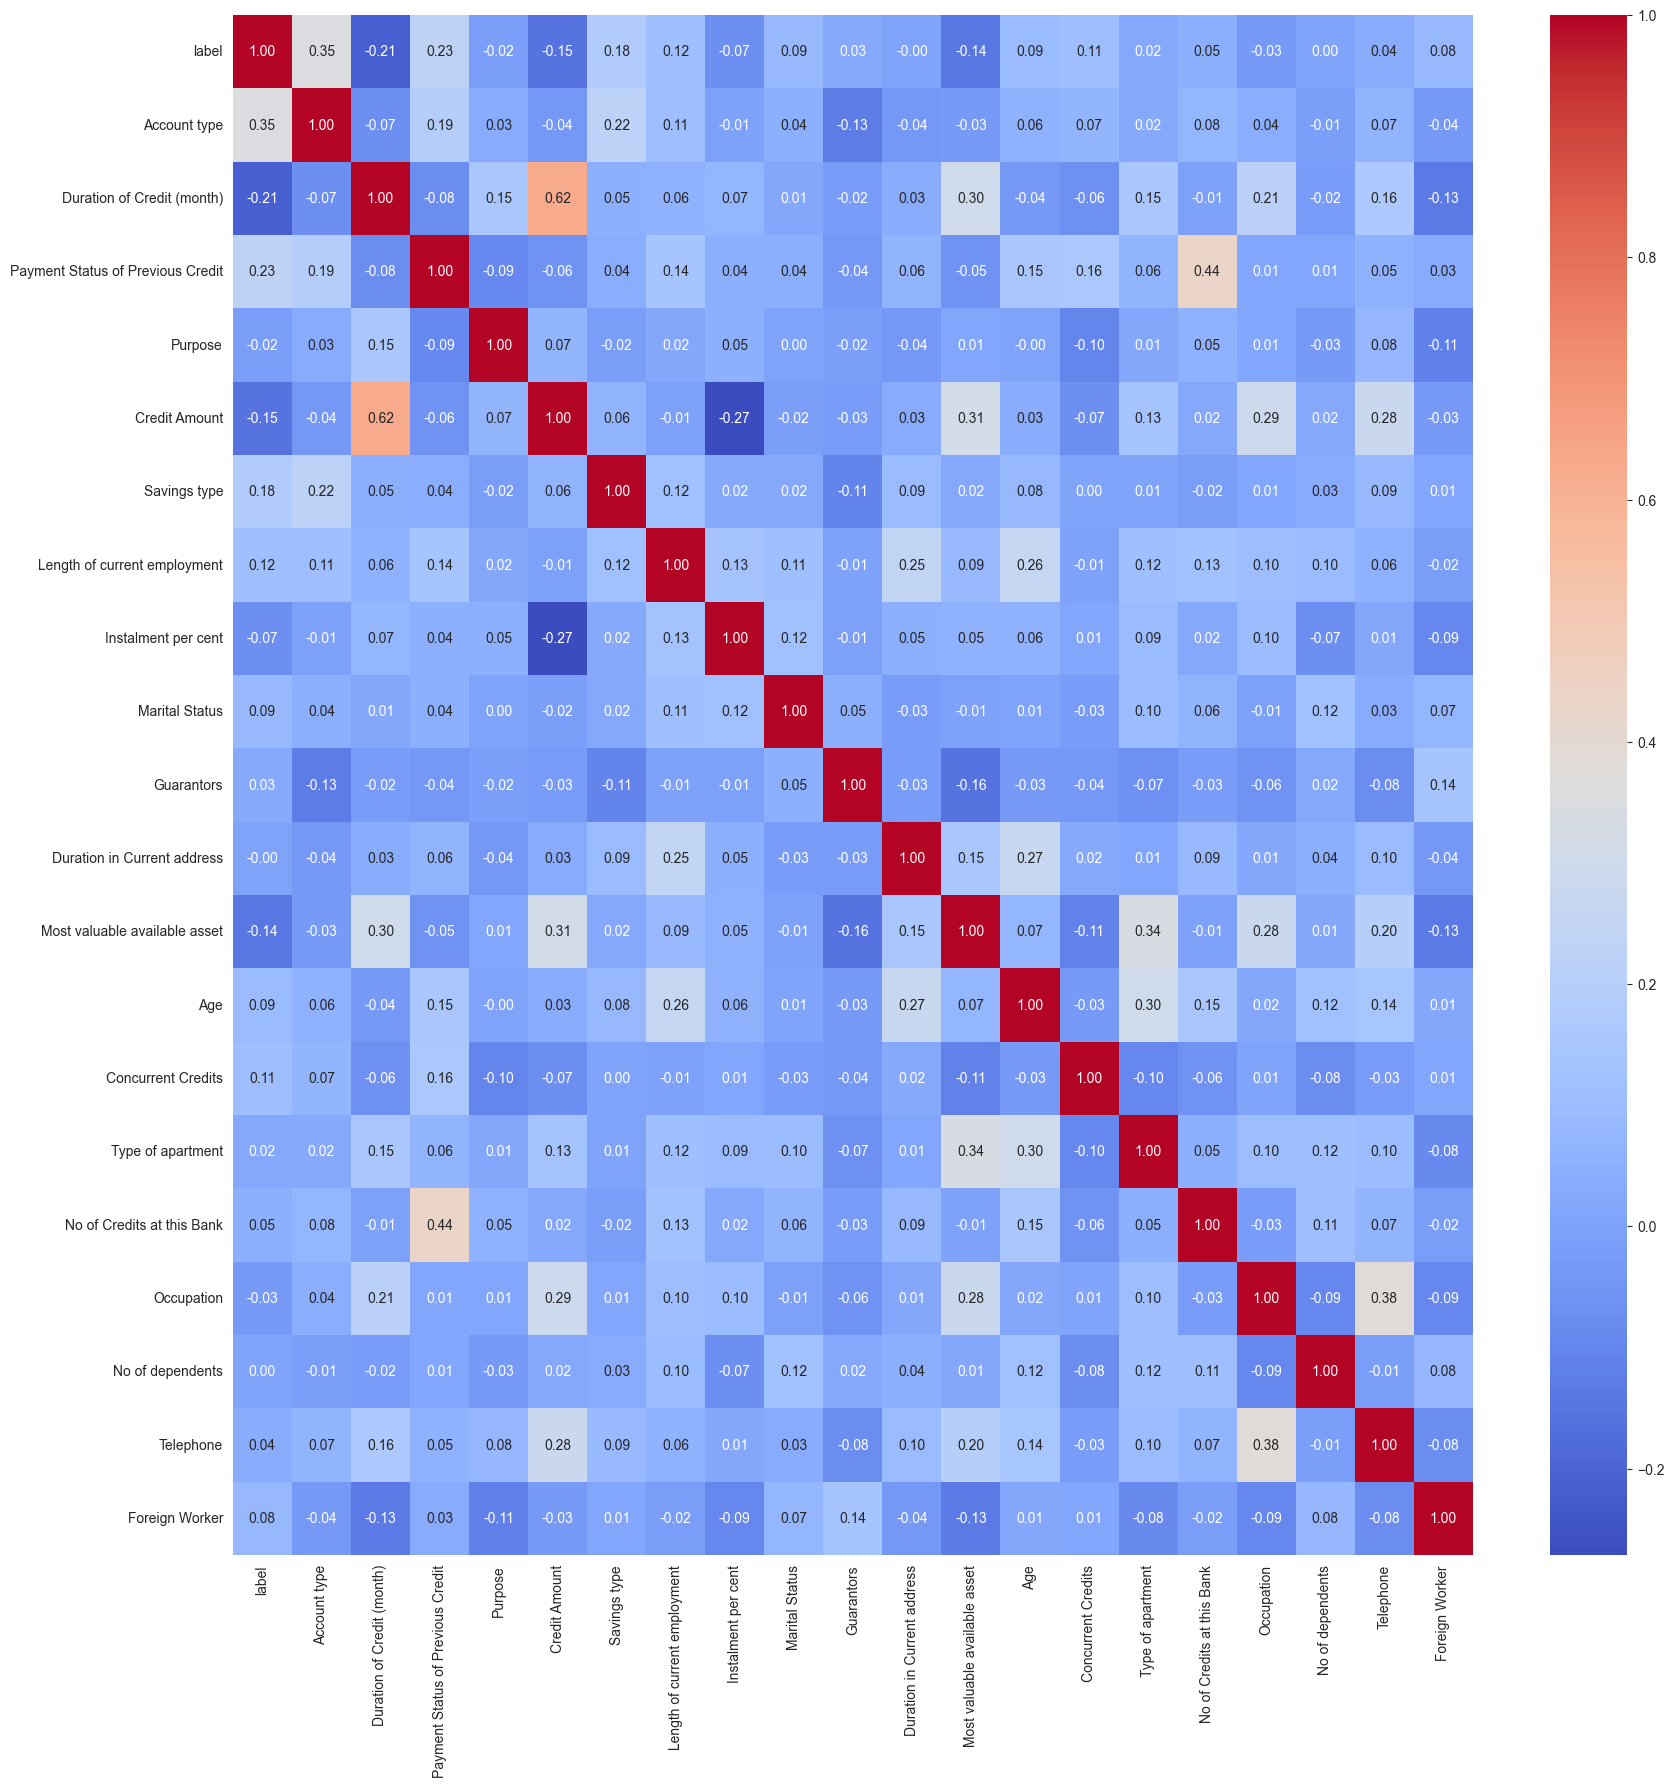

In [13]:
# Check the relationship between the columns
plt.figure(figsize=(20, 20))
sns.heatmap(df.drop(columns=[index]).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

## Feature Engineering

Based on the insights gathered in the data exploration section, we will now proceed to engineer the data as follows:

- Set the `user_id` column as the index of the data
- Replace whitespace(" ") with underscore("_")
- Handle categorical features
- Scale the data
- Handle Class Imbalance

In [14]:
scaler = StandardScaler()

def feature_engineering(data: pd.DataFrame, index: str="user_id", target: str="label")->pd.DataFrame:
    # Ensure the received data is of expected class
    assert isinstance(data, pd.DataFrame), "input dataframe must be of instance pd.Dataframe"
    print("Received data is a Pandas DataFrame")

    # Ensure user_id is present in the data
    assert index in data.columns and target in data.columns, f"Both {index!r} and {target!r} must be present in dataframe"
    print(f"Both {index!r} and {target!r} are present in the DataFrame")

    print("Engineering Features...")

    # Create a copy of the data
    df = data.copy(deep=True)
    print("\t...Insurance copy created")

    # Set the index as the index of the dataframe
    df.set_index(index, inplace=True)
    print(f"\t...Index set to {index!r}")

    # Replace whitespace(" ") with underscore("_")
    df.columns = df.columns.str.replace(" ", "_")
    df.columns = df.columns.str.lower()
    print("\t...Whitespaces replaced with underscores and columns converted to lower strings")

    # Split into target and features
    X = df.drop(columns=target)
    y = df[target]

    # Handle categorical features
    # Get the columns with less than 10 unique values
    cat = X.columns[X.nunique() <= 10]
    # Convert the data type to categorical
    X_cat = X[cat].astype("category")
    X_cat = pd.get_dummies(data=X_cat, drop_first=True, dtype=int)
    X = pd.concat(objs=[X_cat, X.drop(columns=cat)], axis=1)
    print("\t...Categorical features handled")
    print("Feature engineering completed")

    return X, y

# Engineer the data
X_cleaned, y = feature_engineering(df)

# Scale the data
X_scaled = scaler.fit_transform(X_cleaned)

Received data is a Pandas DataFrame
Both 'user_id' and 'label' are present in the DataFrame
Engineering Features...
	...Insurance copy created
	...Index set to 'user_id'
	...Whitespaces replaced with underscores and columns converted to lower strings
	...Categorical features handled
Feature engineering completed


In [15]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=RANDOM_STATE, shuffle=True)

## Model Building

In [16]:
names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Linear SVM',
    'RBF SVM',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Extra tree',
    'Extra trees',

]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    ExtraTreeClassifier(),
    ExtraTreesClassifier(),
]

In [17]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred)
    recall    = metrics.recall_score(y_train, y_pred)

    f1        = metrics.f1_score(y_train, y_pred)
    f1_test   = metrics.f1_score(y_test, y_pred_test)

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting RBF SVM model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
Fitting Extra tree model...
... predicting
... scoring
Fitting Extra trees model...
... predicting
... scoring
... All done!


That's all done! Now let's take a look at the results.

In [18]:
results.sort_values('F1 Train', ascending=False)

Accuracy  Precision    Recall  F1 Train   F1 Test  \
Classifier                                                               
RBF SVM               1.00000   1.000000  1.000000  1.000000  0.833819   
Extra tree            1.00000   1.000000  1.000000  1.000000  0.749091   
Extra trees           1.00000   1.000000  1.000000  1.000000  0.848684   
Nearest Neighbors     0.82625   0.849498  0.912029  0.879654  0.825175   
AdaBoost              0.80000   0.822764  0.908438  0.863481  0.859060   
Decision Tree         0.78875   0.793051  0.942549  0.861362  0.823151   
Linear SVM            0.79000   0.797856  0.935368  0.861157  0.862745   
Logistic Regression   0.78250   0.810373  0.897666  0.851789  0.879195   
Random Forest         0.69875   0.697995  1.000000  0.822140  0.833819   

                     Train Time  
Classifier                       
RBF SVM                0.026108  
Extra tree             0.000799  
Extra trees            0.091133  
Nearest Neighbors      0.000178  
AdaBoost               0.050577  
Decision Tree          0.001913  
Linear SVM             0.014005  
Logistic Regression    0.005021  
Random Forest          0.006126

This is way too many numbers to comprehend. Let's plot these values to see if we can make sense of them.

<Axes: xlabel='Classifier'>

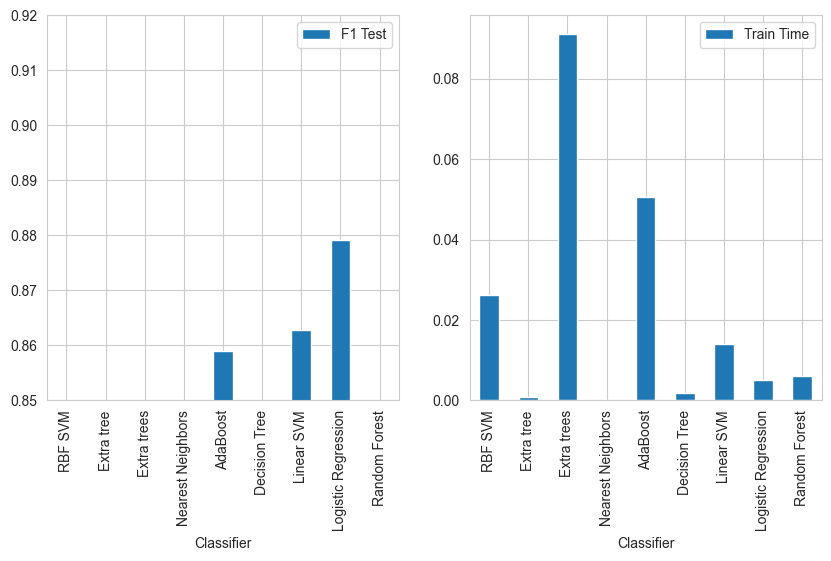

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.85,0.92])
results.plot(y='Train Time', kind='bar', ax=ax[1])

## Model Validation

### K-Fold Cross Validation

In [20]:
cv = []
for name, model in models.items():
    print ()
    print(name)
    scores = cross_val_score(model, X=X_scaled, y=y, cv=10)
    print("Accuracy: {:0.2f} (+/- {:0.4f})".format(scores.mean(), scores.std()))
    cv.append([name, scores.mean(), scores.std() ])

cv = pd.DataFrame(cv, columns=['Model', 'CV_Mean', 'CV_Std_Dev'])
cv.set_index('Model', inplace=True)


Logistic Regression
Accuracy: 0.72 (+/- 0.0748)

Nearest Neighbors
Accuracy: 0.68 (+/- 0.0441)

Linear SVM
Accuracy: 0.73 (+/- 0.0643)

RBF SVM
Accuracy: 0.70 (+/- 0.0000)

Decision Tree
Accuracy: 0.71 (+/- 0.0751)

Random Forest
Accuracy: 0.70 (+/- 0.0000)

AdaBoost
Accuracy: 0.72 (+/- 0.0611)

Extra tree
Accuracy: 0.62 (+/- 0.0451)

Extra trees
Accuracy: 0.71 (+/- 0.0390)


<Axes: xlabel='Model'>

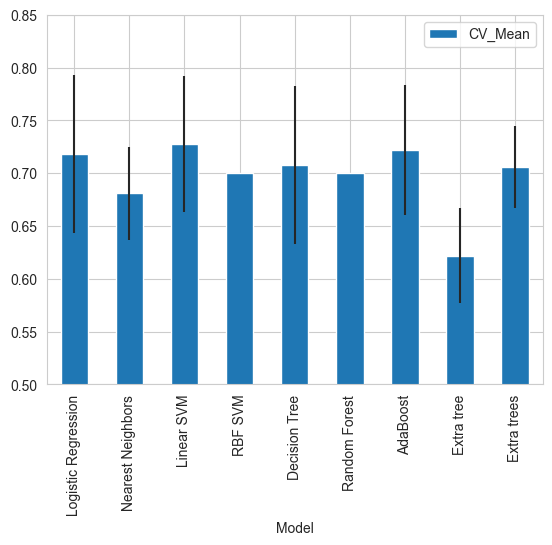

In [21]:
cv.plot(y='CV_Mean', yerr='CV_Std_Dev',kind='bar', ylim=[0.5, 0.85])

## HyperParameter Tuning

### WARNING!

The code cell below takes over 3 hours to run

In [ ]:
# selected_model = RandomForestClassifier()

# # Initialize the RandomForestClassifier
# rf = RandomForestClassifier(random_state=42)

# # Define the hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300, 500],  # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the trees
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
#     'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
#     'max_features': ['sqrt', 'log2', None],  # Number of features to consider for the best split
#     'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
#     'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
#     'class_weight': [None, 'balanced']  # Class weights to handle imbalanced datasets
# }

# # Set up the GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                            cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# # Fit the model
# grid_search.fit(X_train, y_train)

# # View the best parameters
# best_params = grid_search.best_params_
# print("Best parameters found:", best_params)

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth

## Model Selection

In [23]:
best_params = {
    'bootstrap': True,
    'class_weight': 'balanced',
    'criterion': 'gini',
    'max_depth': 20,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 10,
    'n_estimators': 100,
}

model = RandomForestClassifier(**best_params, random_state=RANDOM_STATE)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, min_samples_split=10,
                       random_state=24)

In [24]:
with open(BEST_PARAMS, "w") as file:
    import json
    json.dump(best_params, file)